In [1]:
import pandas as pd
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
import catboost
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv("german_creditrisk_data.csv")

In [3]:
data_=data.copy()

In [4]:
data_.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,credit_risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,NaN,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,0


In [5]:
data_.describe()

,Age,Job,Credit amount,Duration,credit_risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000,0.700000
std,11.375469,0.653614,2822.736876,12.058814,0.458487
min,19.000000,0.000000,250.000000,4.000000,0.000000
25%,27.000000,2.000000,1365.500000,12.000000,0.000000
50%,33.000000,2.000000,2319.500000,18.000000,1.000000
75%,42.000000,2.000000,3972.250000,24.000000,1.000000
max,75.000000,3.000000,18424.000000,72.000000,1.000000


In [6]:
data_.shape

(1000, 10)

In [7]:
pd.isnull(data_).sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
credit_risk           0
dtype: int64

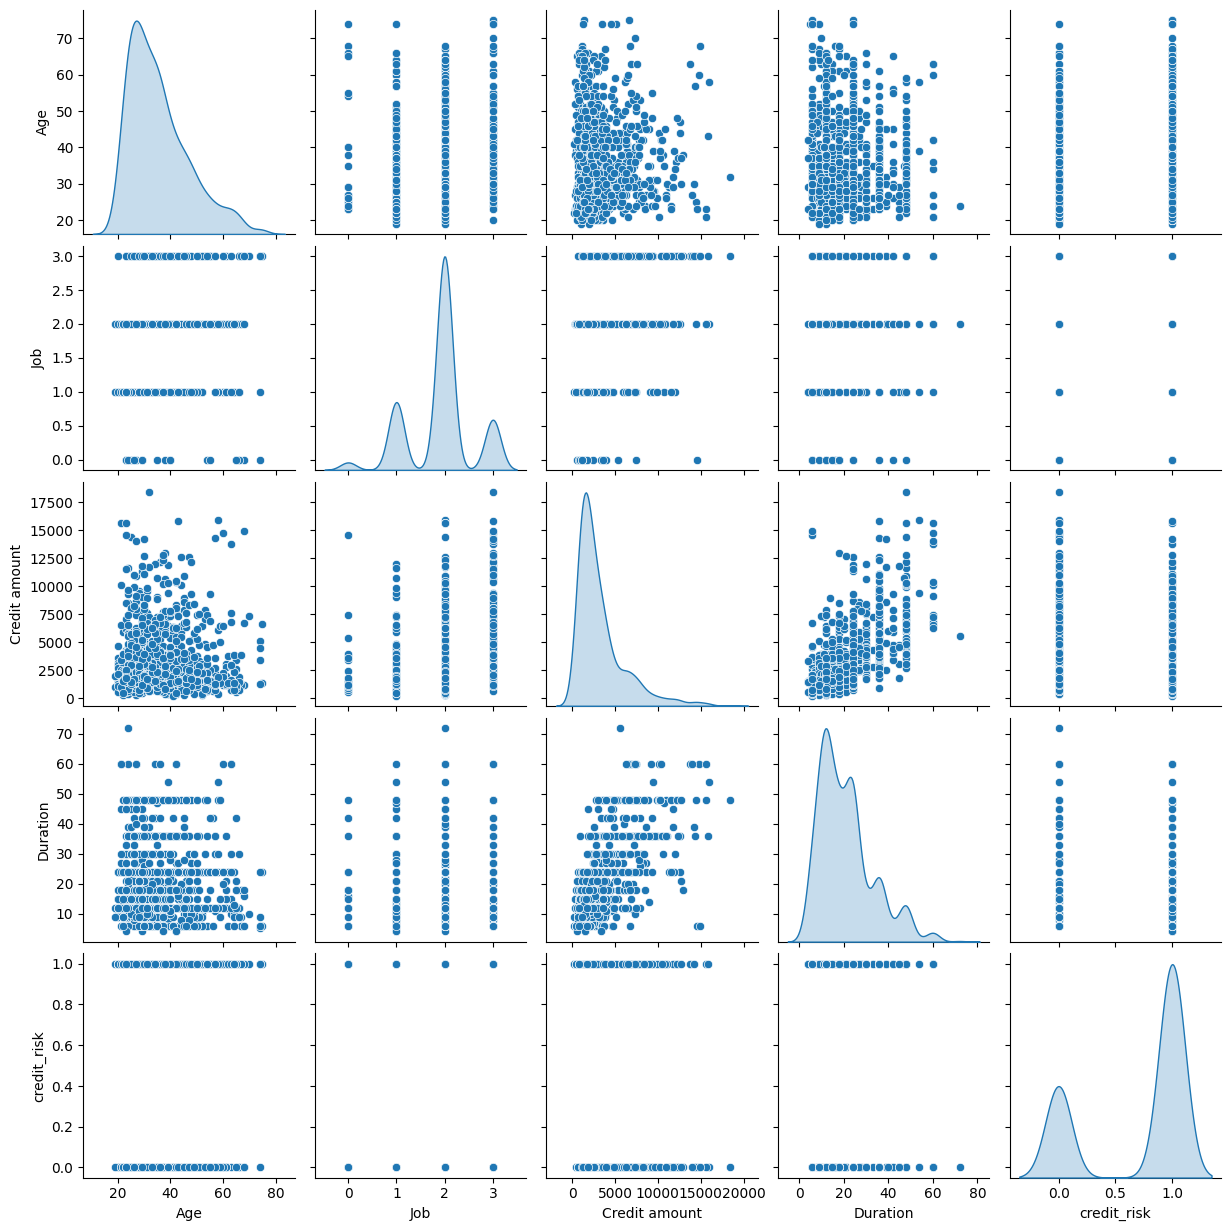

In [8]:
sns.pairplot(data_,kind="scatter",diag_kind="kde",dropna=True)

In [9]:
data_.isnull().any()

Age                 False
Sex                 False
Job                 False
Housing             False
Saving accounts      True
Checking account     True
Credit amount       False
Duration            False
Purpose             False
credit_risk         False
dtype: bool

<h5 style="color: blue;">Label encoded using ordinal, because it is ordered category used ordinal encoder</h5>


In [10]:
import numpy as np

data_saving_cat = [x for x in data_["Saving accounts"].unique() if x is not np.nan]

print(data_saving_cat)
data_checking_cat=[x for x in data_["Checking account"].unique() if x is not np.nan]
print(data_checking_cat)
category=[data_saving_cat,data_checking_cat]
print(category)


['little', 'quite rich', 'rich', 'moderate']
['little', 'moderate', 'rich']
[['little', 'quite rich', 'rich', 'moderate'], ['little', 'moderate', 'rich']]


In [11]:
from sklearn.preprocessing import OrdinalEncoder

ord = OrdinalEncoder(categories=category, handle_unknown='use_encoded_value', unknown_value=np.nan)
data_[['Saving accounts','Checking account']] = ord.fit_transform(data_[['Saving accounts','Checking account']])
data_.head()


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,credit_risk
0,67,male,2,own,NaN,0.0,1169,6,radio/TV,1
1,22,female,2,own,0.0,1.0,5951,48,radio/TV,0
2,49,male,1,own,0.0,NaN,2096,12,education,1
3,45,male,2,free,0.0,0.0,7882,42,furniture/equipment,1
4,53,male,2,free,0.0,0.0,4870,24,car,0


<h5 style="color: blue;">Using onehot encoding for sex,Pur and Housing</h5>

In [12]:
data_.Housing.unique().sum()

'ownfreerent'

In [13]:
data_.Purpose.unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

In [14]:
cols = ["Sex", "Housing","Purpose"]
dummies = pd.get_dummies(data_[cols], drop_first=True, dtype=np.int8)
dummies
data_enc = pd.concat([data_.drop(columns=["Sex", "Housing","Purpose"]), dummies], axis=1)
data_enc

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,credit_risk,Sex_male,Housing_own,Housing_rent,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,NaN,0.0,1169,6,1,1,1,0,0,0,0,0,1,0,0
1,22,2,0.0,1.0,5951,48,0,0,1,0,0,0,0,0,1,0,0
2,49,1,0.0,NaN,2096,12,1,1,1,0,0,0,1,0,0,0,0
3,45,2,0.0,0.0,7882,42,1,1,0,0,0,0,0,1,0,0,0
4,53,2,0.0,0.0,4870,24,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,0.0,NaN,1736,12,1,0,1,0,0,0,0,1,0,0,0
996,40,3,0.0,0.0,3857,30,1,1,1,0,1,0,0,0,0,0,0
997,38,2,0.0,NaN,804,12,1,1,1,0,0,0,0,0,1,0,0
998,23,2,0.0,0.0,1845,45,0,1,0,0,0,0,0,0,1,0,0


In [15]:
data_enc.head()

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,credit_risk,Sex_male,Housing_own,Housing_rent,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,NaN,0.0,1169,6,1,1,1,0,0,0,0,0,1,0,0
1,22,2,0.0,1.0,5951,48,0,0,1,0,0,0,0,0,1,0,0
2,49,1,0.0,NaN,2096,12,1,1,1,0,0,0,1,0,0,0,0
3,45,2,0.0,0.0,7882,42,1,1,0,0,0,0,0,1,0,0,0
4,53,2,0.0,0.0,4870,24,0,1,0,0,1,0,0,0,0,0,0


<h5>for the imputation, we need to select the right columns for the data feeding</h5>

<Axes: >

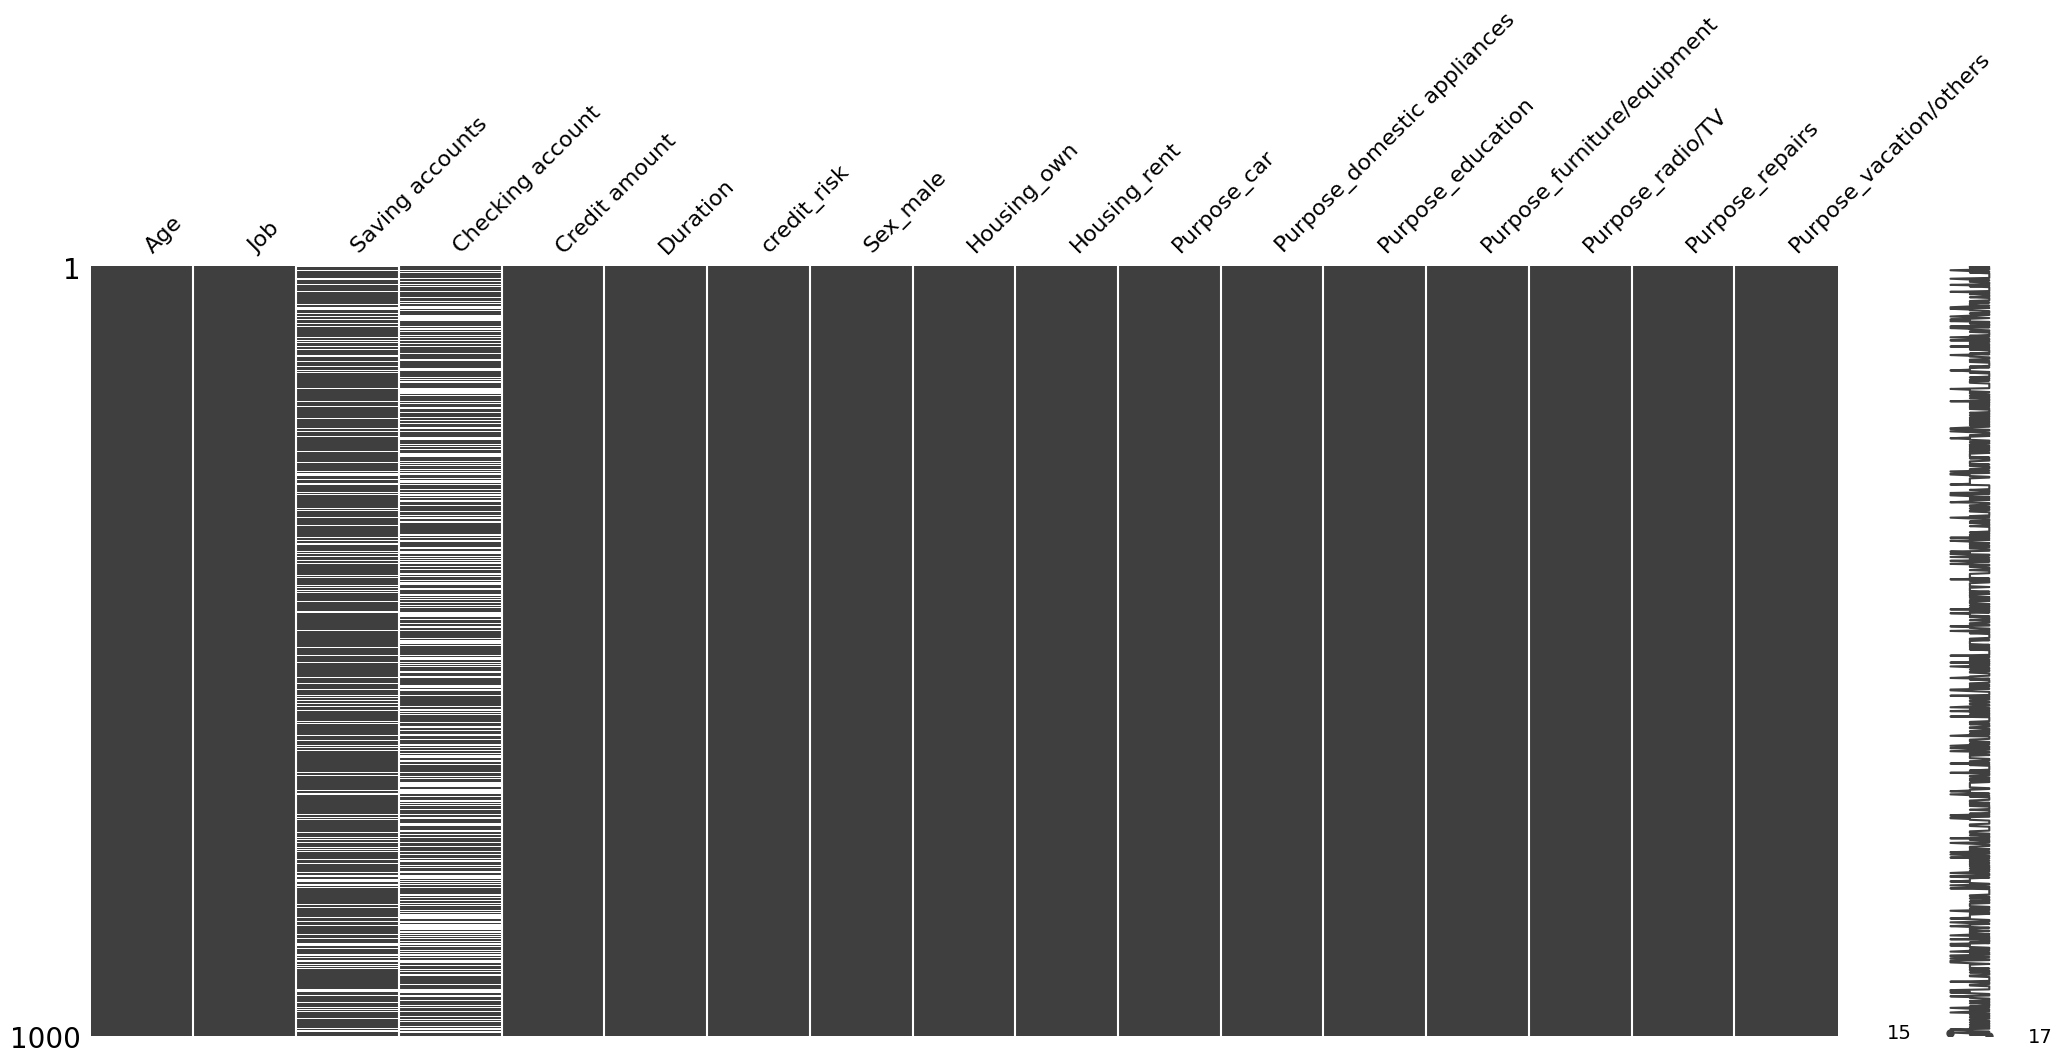

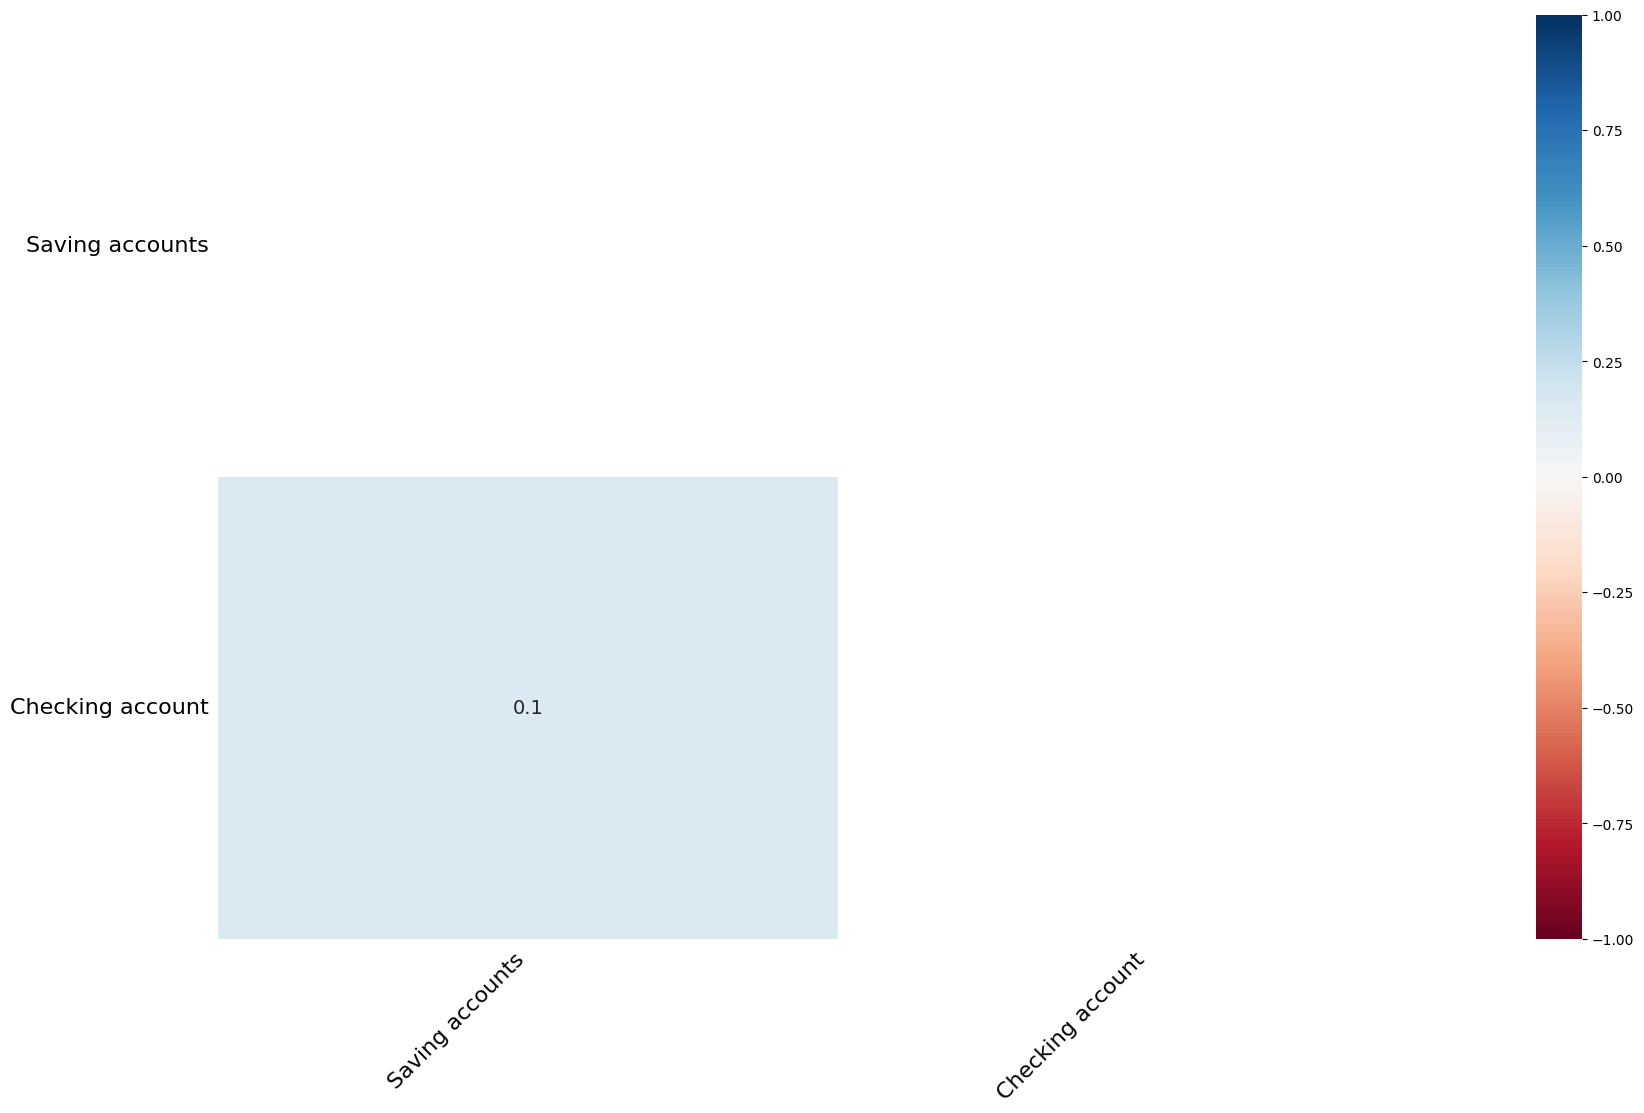

In [16]:
import missingno as msno
msno.matrix(data_enc)
msno.heatmap(data_enc)


<Axes: >

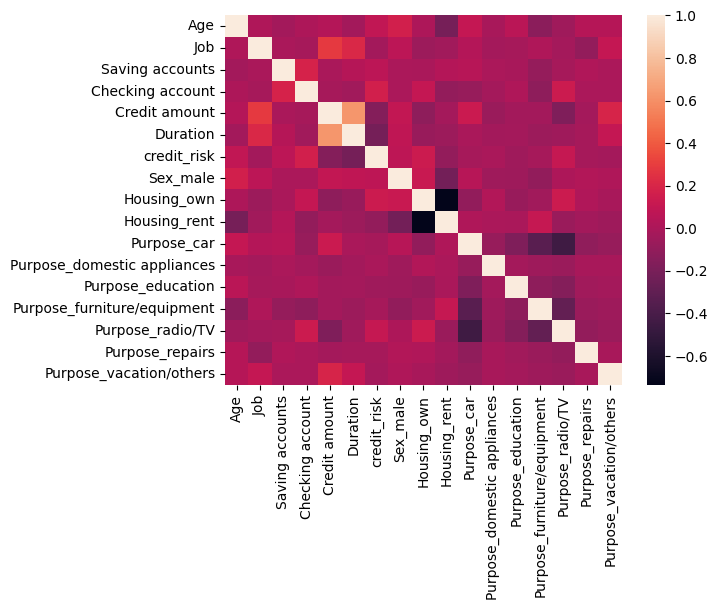

In [17]:
sns.heatmap(data_enc.corr())

<h6>from the heatmap we can use ['Age', 
 'Job', 
 'Housing', 
 'Credit_amount', 
 'Duration', 
 'Purpose', 
 'Sex']
 for the iterative imputation because it showing more relationship with checking accounting saving accounting</h6>

In [18]:
data_col=data_enc.columns

<h5>for imputation i am using experimental learning imputaion</h5>

In [19]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
ie=IterativeImputer()
data_imputed=ie.fit_transform(data_enc)

In [20]:
data_imputed=pd.DataFrame(data=data_imputed,columns=data_col)
np.round(data_imputed)

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,credit_risk,Sex_male,Housing_own,Housing_rent,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67.0,2.0,0.0,0.0,1169.0,6.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,22.0,2.0,0.0,1.0,5951.0,48.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,49.0,1.0,0.0,1.0,2096.0,12.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,45.0,2.0,0.0,0.0,7882.0,42.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,53.0,2.0,0.0,0.0,4870.0,24.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31.0,1.0,0.0,1.0,1736.0,12.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
996,40.0,3.0,0.0,0.0,3857.0,30.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
997,38.0,2.0,0.0,1.0,804.0,12.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
998,23.0,2.0,0.0,0.0,1845.0,45.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [21]:
pd.isnull(data_imputed).sum()

Age                            0
Job                            0
Saving accounts                0
Checking account               0
Credit amount                  0
Duration                       0
credit_risk                    0
Sex_male                       0
Housing_own                    0
Housing_rent                   0
Purpose_car                    0
Purpose_domestic appliances    0
Purpose_education              0
Purpose_furniture/equipment    0
Purpose_radio/TV               0
Purpose_repairs                0
Purpose_vacation/others        0
dtype: int64

<h3>splitting the model as train,test,split and predicting the model</h3>

In [22]:

y = data_imputed['credit_risk']


x = data_imputed.drop(columns=['credit_risk'])

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,stratify=y)

In [23]:
ca = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.05, verbose=0)

In [24]:

categorical_cols = x_train.select_dtypes(include=['object', 'category']).columns.tolist()

print(categorical_cols)




[]


In [25]:
ca.fit(
    x_train,
    y_train)

In [26]:
y_pred=ca.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred,y_test)

In [28]:
acc

0.74

In [29]:
x_train

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
124,27.0,2.0,0.557789,1.000000,1924.0,18.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
828,47.0,2.0,0.430385,0.000000,8335.0,36.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
450,30.0,3.0,0.636857,0.713841,11054.0,36.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
228,22.0,2.0,0.000000,0.662323,1478.0,9.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
443,41.0,1.0,0.000000,0.595842,719.0,12.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,54.0,2.0,0.000000,0.000000,3051.0,48.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,35.0,1.0,0.607790,0.758170,9055.0,36.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
337,24.0,2.0,0.489408,0.000000,1275.0,15.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
635,47.0,2.0,0.000000,0.726019,1393.0,12.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [30]:
data["Saving accounts"].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [31]:
data["Checking account"].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

<h2>for the flask model i am creating a pipeline and deeding the data into it and saving it using pickle library</h2>

In [32]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

ordinal_cols = ['Saving accounts', 'Checking account']
ordinal_categories = [['little', 'quite rich','rich','moderate'], ['little', 'moderate','rich']]
nominal_cols = ['Sex', 'Housing', 'Purpose']


ordinal_pipeline = Pipeline([
    ('encode', OrdinalEncoder(
        categories=ordinal_categories,
        handle_unknown='use_encoded_value',
        unknown_value=-1,
    )),
    ('imputer', IterativeImputer(random_state=42)),
    ('rounder', FunctionTransformer(np.round))
])


preprocessor = ColumnTransformer([
    ('ord', ordinal_pipeline, ordinal_cols),
    ('nom', OneHotEncoder(drop='first', sparse_output=False), nominal_cols)
], remainder='passthrough')

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier(iterations=500, depth=6, learning_rate=0.05, verbose=0))
])


x = data.iloc[:, :-1]
y = data.iloc[:, -1]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)
print(xtrain['Saving accounts'].unique())
print(xtrain['Checking account'].unique())

pipeline.fit(xtrain, ytrain)
print("Training Completed!")


['little' 'moderate' nan 'quite rich' 'rich']
[nan 'moderate' 'little' 'rich']
Training Completed!


In [33]:
import joblib
joblib.dump(pipeline, "pipeline.joblib")


['pipeline.joblib']

In [40]:
test_df = pd.DataFrame({
    "Age": [34],
    "Sex": ["male"],  # string
    "Job": [2],
    "Housing": ["own"],  # string
    "Saving accounts": ["little"],  
    "Checking account": ["moderate"],  
    "Credit amount": [3445],
    "Duration": [12],
    "Purpose": ["radio/TV"]  # string
})

pipeline.predict(test_df)

array([1])